In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
import pickle
import collections

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/georgemcintire/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
! ls

538_README.md
538_analysis_notebook.ipynb
538_police_killings.csv
COUNTED_README.txt
Counted_Data_Analysis.ipynb
WP_Fatal_Police_Shootings.csv
Washington Post Data Analysis.ipynb
ardpdqp.pdf
data-police-shootings
fatal_encounters_data.ipynb
fatal_encounters_form_responses.csv
mapping-violence.html
mapping_violence_13_15_Police Killings.csv
police-locals.csv
the-counted-2015.csv
the-counted-2016.csv


In [3]:
from IPython.core.display import HTML
css = open('/Users/georgemcintire/Data Science:Python/pycon-pandas-tutorial/style-table.css').read() + open('/Users/georgemcintire/Data Science:Python/pycon-pandas-tutorial/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [26]:
df = pd.read_csv("538_police_killings.csv")

In [27]:
df.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954


In [28]:
df.day = df.day.apply(lambda x:str(x))

df.month = df.month.apply(lambda x:str(x))

df.year = df.year.apply(lambda x:str(x))

df["date"] = df["month"] + "-" + df["day"] + "-" + df["year"]

In [29]:
df["date"] = pd.to_datetime(df.date)

In [30]:
del df["month"]

del df["day"]

del df["year"]

In [31]:
df.head()

,name,age,gender,raceethnicity,streetaddress,city,state,latitude,longitude,state_fp,...,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college,date
0,A'donte Washington,16,Male,Black,Clearview Ln,Millbrook,AL,32.529577,-86.362829,1,...,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510,2015-02-23
1,Aaron Rutledge,27,Male,White,300 block Iris Park Dr,Pineville,LA,31.321739,-92.434860,22,...,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402,2015-04-02
2,Aaron Siler,26,Male,White,22nd Ave and 56th St,Kenosha,WI,42.583560,-87.835710,55,...,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312,2015-03-14
3,Aaron Valdez,25,Male,Hispanic/Latino,3000 Seminole Ave,South Gate,CA,33.939298,-118.219463,6,...,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133,2015-03-11
4,Adam Jovicic,29,Male,White,364 Hiwood Ave,Munroe Falls,OH,41.148575,-81.429878,39,...,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954,2015-03-19


In [32]:
df.sort("date", inplace=True)

/Users/georgemcintire/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [38]:
df.index=df.date

In [39]:
df.head()

,name,age,gender,raceethnicity,streetaddress,city,state,latitude,longitude,state_fp,...,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college,date
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,Garrett Gagne,22,Male,White,Crowell Rd and Tipcart Dr,Chatham,MA,41.684818,-69.966423,25,...,31641,67059,60526,1.107937,4,4,7.7,0.096795,0.527820,2015-01-01
2015-01-01,Matthew Ajibade,22,Male,Black,1050 Carl Griffin Dr,Savannah,GA,32.066692,-81.167877,13,...,25190,33545,45794,0.732520,2,1,30.1,0.119608,0.202454,2015-01-01
2015-01-01,Roberto Ornelas,18,Male,Hispanic/Latino,39 N Marlin Ave,Key Largo,FL,25.155903,-80.390259,12,...,25977,54219,53607,1.011416,3,3,16.4,0.081263,0.313959,2015-01-01
2015-01-02,Lewis Lembke,47,Male,White,4505 SW Masters Loop,Aloha,OR,45.486691,-122.891251,41,...,29959,56020,64180,0.872858,2,3,8.8,0.135548,0.174887,2015-01-02
2015-01-02,Tim Elliott,53,Male,Unknown,600 E Island Lake Dr,Shelton,WA,47.246532,-123.119499,53,...,18999,39495,48755,0.810071,1,2,18.4,0.064193,0.091158,2015-01-02


In [40]:
df.shape

(467, 32)

In [41]:
df.tail()

,name,age,gender,raceethnicity,streetaddress,city,state,latitude,longitude,state_fp,...,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college,date
date,,,,,,,,,,,,,,,,,,,,,
2015-05-31,Richard Davis,50,Male,Black,Tremont St and Morgan St,Rochester,NY,43.147850,-77.630950,36,...,11558,18833,52394,0.359450,NaN,1,49.9,0.259259,0.096531,2015-05-31
2015-05-31,James Morris,40,Male,Unknown,Juanipero Way and La Loma Dr,Medford,OR,42.311009,-122.831627,41,...,22947,40781,44005,0.926736,2,2,20.2,0.187595,0.378758,2015-05-31
2015-05-31,Jeffrey Pitts,36,Male,White,3500 Ebenezer Rd,Conyers,GA,33.596124,-84.046333,13,...,29063,54146,52579,1.029803,NaN,3,8.1,0.140741,0.225638,2015-05-31
2015-06-01,Unknown,Unknown,Male,White,271 Greece Ridge Center Dr,Rochester,NY,32.407139,-96.073891,48,...,22969,50280,43439,1.157485,5,3,17.9,0.058573,0.100249,2015-06-01
2015-06-01,James Bushey,47,Male,White,2225 Texas Hwy 256 Loop,Palestine,TX,31.774197,-95.651957,48,...,18238,31815,40653,0.782599,NaN,1,34.8,0.097790,0.162666,2015-06-01


In [52]:
df["date"] = pd.to_datetime(df["date"])

In [55]:
df["race"] = df["raceethnicity"]

In [56]:
del df["raceethnicity"]

In [57]:
race_counts = df["race"].value_counts()

In [58]:
race_counts

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

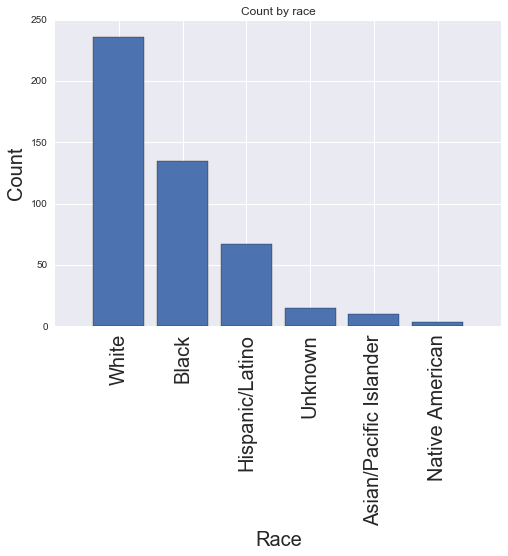

In [63]:
plt.bar(range(len(race_counts)), race_counts, align="center")
plt.xticks(range(len(race_counts)), race_counts.index, rotation="vertical", size=20)
plt.xlabel("Race", size=20)
plt.ylabel("Count", size=20)
plt.title("Count by race")
plt.show()

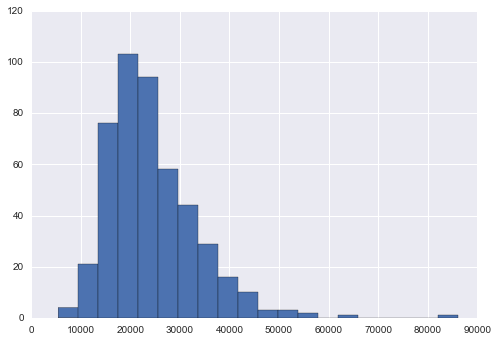

In [65]:
df["p_income"][df["p_income"]!="-"].astype(float).hist(bins=20)

In [67]:
df["state"].value_counts()

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
NJ    11
WA    11
IL    11
LA    11
MO    10
MD    10
OH    10
NC    10
VA     9
SC     9
MI     9
IN     8
OR     8
AL     8
PA     7
KY     7
TN     6
NE     6
MS     6
KS     6
MN     6
UT     5
WI     5
MA     5
NM     5
ID     4
AR     4
HI     4
NV     3
DE     2
IA     2
WV     2
MT     2
AK     2
WY     1
ME     1
CT     1
NH     1
DC     1
Name: state, dtype: int64

In [68]:
import csv

In [69]:
! ls

538_README.md
538_analysis_notebook.ipynb
538_police_killings.csv
COUNTED_README.txt
Counted_Data_Analysis.ipynb
WP_Fatal_Police_Shootings.csv
Washington Post Data Analysis.ipynb
ardpdqp.pdf
data-police-shootings
fatal_encounters_data.ipynb
fatal_encounters_form_responses.csv
graphics
mapping-violence.html
mapping_violence_13_15_Police Killings.csv
police-locals.csv
state_np.csv
state_per_capita_rate.csv
the-counted-2015.csv
the-counted-2016.csv


In [75]:
f = csv.reader("state_np.csv")

Error: unknown dialect

In [81]:
with open("state_np.pkl", 'r') as picklefile: 
    state_np = pickle.load(picklefile)

In [82]:
state_np

array([['WY', '1.02370386295'],
       ['NM', '1.00714159308'],
       ['OK', '0.971534549047'],
       ['DC', '0.89255431193'],
       ['AK', '0.67711041775'],
       ['NV', '0.657247275451'],
       ['WV', '0.650714050218'],
       ['AZ', '0.644399255133'],
       ['LA', '0.599478796007'],
       ['CO', '0.568122048743'],
       ['CA', '0.536469475985'],
       ['ID', '0.483404131897'],
       ['NE', '0.474635980572'],
       ['KY', '0.429369604067'],
       ['SC', '0.428908778456'],
       ['DE', '0.422862483006'],
       ['OR', '0.421943336981'],
       ['MS', '0.401024885933'],
       ['TX', '0.393168851387'],
       ['AL', '0.391028650258'],
       ['MT', '0.387240802789'],
       ['GA', '0.381796715765'],
       ['KS', '0.377793828291'],
       ['MO', '0.361623703579'],
       ['FL', '0.35024935781'],
       ['HI', '0.34925883782'],
       ['UT', '0.333787395454'],
       ['WA', '0.32076532934'],
       ['TN', '0.318167404234'],
       ['IN', '0.317235878471'],
       ['OH', '0.

In [85]:
df.columns

Index([u'name', u'age', u'gender', u'streetaddress', u'city', u'state',
       u'latitude', u'longitude', u'state_fp', u'county_fp', u'tract_ce',
       u'geo_id', u'county_id', u'namelsad', u'lawenforcementagency', u'cause',
       u'armed', u'pop', u'share_white', u'share_black', u'share_hispanic',
       u'p_income', u'h_income', u'county_income', u'comp_income',
       u'county_bucket', u'nat_bucket', u'pov', u'urate', u'college', u'date',
       u'race'],
      dtype='object')

In [86]:
df.state_fp

date
2015-01-01    25
2015-01-01    13
2015-01-01    12
2015-01-02    41
2015-01-02    53
2015-01-03    15
2015-01-03    20
2015-01-04     6
2015-01-04    40
2015-01-05     4
2015-01-05     8
2015-01-06    19
2015-01-06    42
2015-01-06     6
2015-01-06     6
2015-01-06    20
2015-01-07    48
2015-01-07    17
2015-01-07    19
2015-01-07    31
2015-01-07    39
2015-01-08    22
2015-01-08    49
2015-01-08    49
2015-01-08     5
2015-01-08    30
2015-01-09     5
2015-01-09    48
2015-01-11     6
2015-01-11    32
              ..
2015-05-21    34
2015-05-22    42
2015-05-23    26
2015-05-23    29
2015-05-23     4
2015-05-25    48
2015-05-25     1
2015-05-26    53
2015-05-26    36
2015-05-26    22
2015-05-27    20
2015-05-27     6
2015-05-27    40
2015-05-27     6
2015-05-27    13
2015-05-27    34
2015-05-28    45
2015-05-28    13
2015-05-28    26
2015-05-28     8
2015-05-29    34
2015-05-29    40
2015-05-29    41
2015-05-30    47
2015-05-30     4
2015-05-31    36
2015-05-31    41
2015-05-3

In [87]:
df.county_bucket

date
2015-01-01     4
2015-01-01     2
2015-01-01     3
2015-01-02     2
2015-01-02     1
2015-01-03     5
2015-01-03     2
2015-01-04     5
2015-01-04     2
2015-01-05     3
2015-01-05     1
2015-01-06     1
2015-01-06     2
2015-01-06     2
2015-01-06     2
2015-01-06     4
2015-01-07     2
2015-01-07     3
2015-01-07     1
2015-01-07     4
2015-01-07   NaN
2015-01-08     1
2015-01-08     2
2015-01-08     4
2015-01-08     2
2015-01-08     5
2015-01-09     1
2015-01-09     1
2015-01-11     2
2015-01-11     2
              ..
2015-05-21     1
2015-05-22     2
2015-05-23     2
2015-05-23     4
2015-05-23     5
2015-05-25     5
2015-05-25     3
2015-05-26     1
2015-05-26     2
2015-05-26   NaN
2015-05-27     1
2015-05-27     4
2015-05-27     5
2015-05-27     4
2015-05-27   NaN
2015-05-27   NaN
2015-05-28   NaN
2015-05-28   NaN
2015-05-28     5
2015-05-28   NaN
2015-05-29     2
2015-05-29   NaN
2015-05-29   NaN
2015-05-30     1
2015-05-30     1
2015-05-31   NaN
2015-05-31     2
2015-05-3